In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [2]:
#Importing the dataset
dataset = pd.read_csv('spam.csv',encoding='latin-1')
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1649,ham,ITS A LAPTOP TAKE IT WITH YOU.,NaN,NaN,NaN
5211,ham,It is only yesterday true true.,NaN,NaN,NaN
2628,ham,Haha... They cant what... At the most tmr forf...,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5264,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [3]:
dataset.shape

(5572, 5)

In [4]:
# 1. Data cleaning
# 2. EDA (exploratory data analysis)
# 3. Text preprocessing
# 4. Modal building
# 5. Evaluation
# 6. Improvement
# 7. Website

##  1. Data cleaning

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
dataset.sample(5)

,v1,v2
2477,ham,I'm done. I'm sorry. I hope your next space gi...
2021,ham,"I don't have anybody's number, I still haven't..."
4375,spam,"If you don't, your prize will go to another cu..."
598,ham,Will do. Was exhausted on train this morning. ...
4344,ham,Enjoy urself tmr...


In [7]:
# renaming the cols
dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)
dataset.sample(10)

,target,text
1978,ham,No I'm in the same boat. Still here at my moms...
2982,ham,What should i eat fo lunch senor
4650,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...
575,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
2654,ham,Its sarcasm.. .nt scarcasim
3913,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
2185,ham,Purity of friendship between two is not about ...
3149,ham,Yo! Howz u? girls never rang after india. L
4732,ham,Good Morning my Dear Shijutta........... Have ...
2425,ham,Hey!!! I almost forgot ... Happy B-day babe ! ...


In [8]:
# converting ham,spam into 0,1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['target']=encoder.fit_transform(dataset['target'])

In [9]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check missing values
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
dataset.duplicated().sum()

403

In [12]:
#remove duplicate values
dataset = dataset.drop_duplicates(keep='first')

In [13]:
# check for duplicate values
dataset.duplicated().sum()

0

## 2. EDA (exploratory data analysis)

In [14]:
# check % of ham and spam
dataset['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

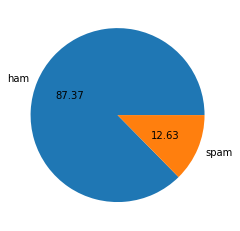

In [15]:
plt.pie(dataset['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
# data is imbalanced

In [17]:
# check no.of char in text
dataset['num_characters'] = dataset['text'].apply(len)
# check no.of words in text
dataset['num_words'] = dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# check no.of sentences in text
dataset['num_sentences'] = dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
# describing
dataset[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# describing for ham
dataset[dataset['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# describing for spam
dataset[dataset['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

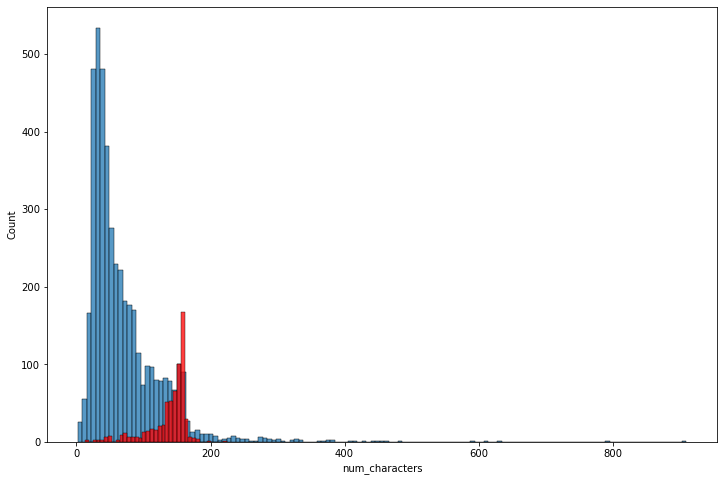

In [23]:
# plotting histograms for ham and spam based on num_characters
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target'] == 0]['num_characters'])
sns.histplot(dataset[dataset['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

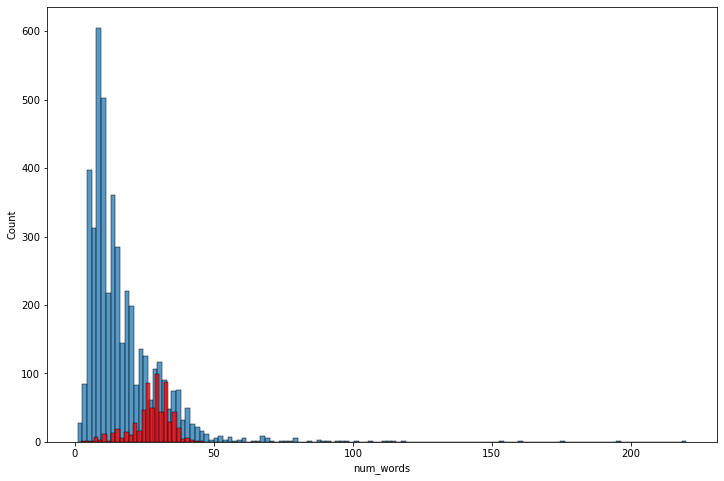

In [24]:
# plotting histograms for ham and spam based on num_words
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target'] == 0]['num_words'])
sns.histplot(dataset[dataset['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

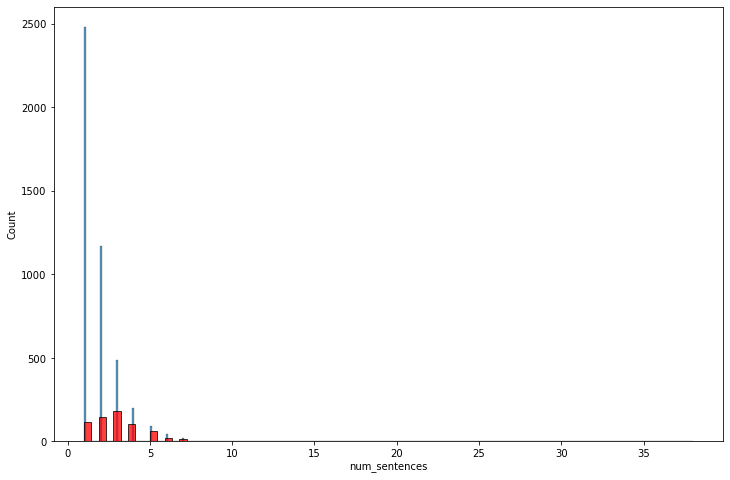

In [25]:
# plotting histograms for ham and spam based on num_sentences
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target'] == 0]['num_sentences'])
sns.histplot(dataset[dataset['target'] == 1]['num_sentences'],color='red')

<AxesSubplot:>

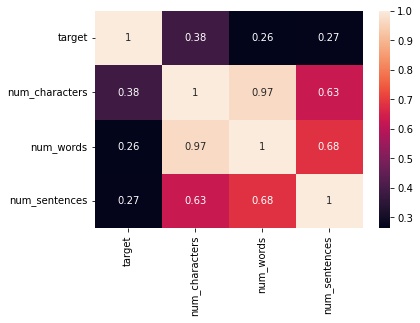

In [26]:
# correlation coefficient
sns .heatmap(dataset.corr(),annot=True)

 ## 3. Data preprocessing
     # lower case
     # tokenization
     # removing special characters
     # Removing stop words and punctuation
     # stemming

In [27]:
def transform_text(text):
    # lower case
    text =text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    # removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # Removing stop words and punctuation
    from nltk.corpus import stopwords
    import string
    for i in text:
            if i not in stopwords.words("english") and i not in string.punctuation:
                y.append(i)
    text = y[:]
    y.clear()
    
    # stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [28]:
# inserting transformed text into dataset
dataset['transformed_text'] = dataset['text'].apply(transform_text)

In [29]:
# to display wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

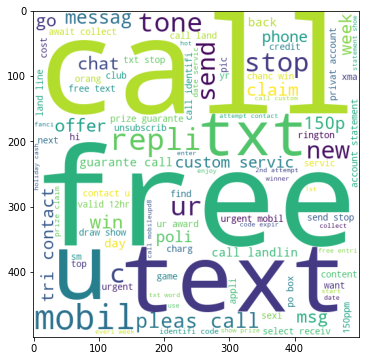

In [30]:
# This will show the most used words in spam
spam_wc = wc.generate(dataset[dataset['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

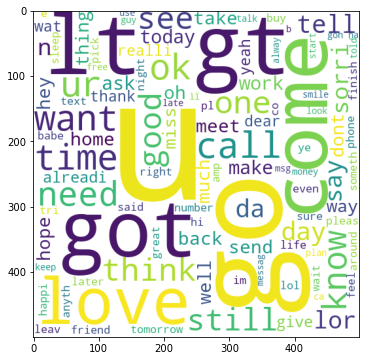

In [31]:
# This will show the most used words in ham
ham_wc = wc.generate(dataset[dataset['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [32]:
# insert all words of spam in a list
spam_corpus=[]
for msg in dataset[dataset['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


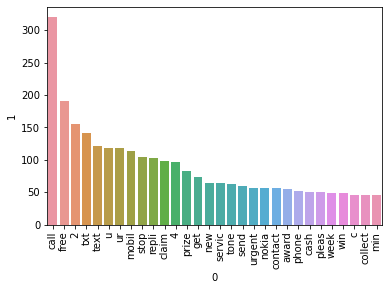

In [33]:
# frequency of spam in above list
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
# insert all words of ham in a list
ham_corpus=[]
for msg in dataset[dataset['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


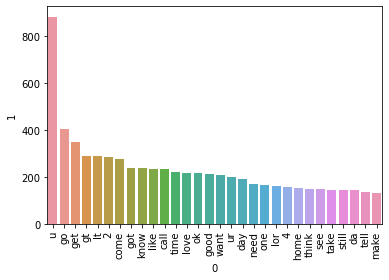

In [35]:
# frequency of ham in above list
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Modal Building

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
# X is messages and y is ham or spam
X = tfidf.fit_transform(dataset['transformed_text']).toarray()
y = dataset['target'].values

In [38]:
# spliting training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [40]:
# GaussianNB algorithm
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [41]:
# naive_bayes - MultinomialNB algorithm
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [42]:
# GaussianNB algorithm
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [43]:
# tfidf --> MNB
# model improve
# 1. Change the max_features parameter of TfTdf

In [44]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))

0.9835589941972921
0.991869918699187


In [45]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))
# pickle.dump(rfc,open('tmodel.pkl','wb'))

In [48]:
for __ in range(int(input("No.of test cases:"))):
    print("Email/SMS Spam Classifier")

    input_sms=input("Enter the message:")

    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = mnb.predict(vector_input)[0]
    # 4. display
    if result == 1:
        print("Spam")
    else:
        print("Not Spam")

No.of test cases:5
Email/SMS Spam Classifier
Enter the message:You've Won! Winning an unexpected prize sounds great in theory.
Not Spam
Email/SMS Spam Classifier
Enter the message:You've Won! Winning an unexpected prize sounds great in theory.
Not Spam
Email/SMS Spam Classifier


KeyboardInterrupt: Interrupted by user